# Pandas & RandomForest

### 랜덤 포레스트 사용하기 : 버섯 분류(독버섯과 식용버섯)


- 독버섯 데이터셋 저장 : url로 부터 독버섯 데이터를 불러와 mushroom.csv로 저장합니다.

In [ ]:
import urllib.request as req
local= "mushrooms.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, local)
print("ok")

- 랜덤 포레스트를 사용한 독버섯 분류 예제 1

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [13]:
# 데이터 읽어 들이기--- (※1)
data = pd.read_csv("mushrooms.csv")
# data = pd.read_csv('mushroom.csv', columns = col)

In [14]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 1. 데이터 살펴보기

### 구조 살펴보기(X, Y / 데이터타입 / 불필요한 데이터 정리(Null 등))

In [15]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.tail()

In [ ]:
data.shape  # 크기

In [ ]:
data.describe   #head + tail + shape

In [ ]:
data.dtypes  # column 별 데이터 타입 확인 / object, int, float..

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [17]:
pd.isnull(data)  # null 값을 찾는 메트릭스   <--> pd.notnull(data)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import numpy as np
np.where(pd.isnull(data))     #Null 값이 있는 위치 찾음

### 시각화 ( 변수간 영향 파악 / 주요요인 가정 등)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 그림 사이즈 기본지정 가능.  figsize 속성으로 중간에 변경 가능함
from matplotlib import rcParams

rcParams['figure.figsize'] = (12,3)

In [30]:
# 기본적으로 matplotlib 은 한글 지원 X.  한글 지원 가능한 글씨체로 변경 필요

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [29]:
platform.system()

'Windows'

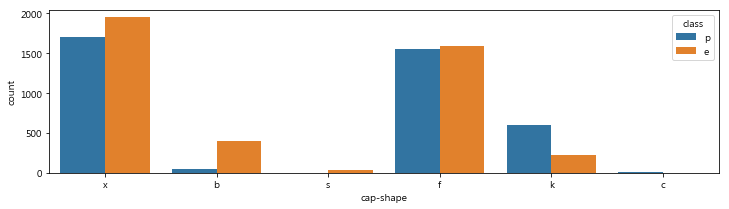

In [31]:
# sns.countplot(data=data, x='1', hue= '0')
sns.countplot(data=data, x='cap-shape', hue= 'class')
# sns.countplot(data=data, x='b', hue= 'is_poison')

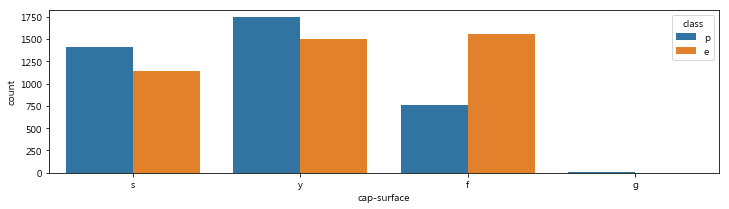

In [33]:
sns.countplot(data=data, x=data.columns[2], hue= 'class')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

속성별로 값 살펴보자...

In [89]:
results=[]
for fe in data.columns[1:]:
    
    for att in set(data[fe]):
        
        count_p = len(data[(data[fe] == att) & (data.iloc[:,0]== 'p')])
        count_e = len(data[(data[fe] == att) & (data.iloc[:,0] == 'e')])
        result = [fe, att, count_p, count_e, count_p/(count_p+count_e), count_e/(count_p+count_e)]
        results.append(result)

In [158]:
results[:20]

[['cap-shape', 'k', 600, 228, 0.7246376811594203, 0.2753623188405797],
 ['cap-shape', 's', 0, 32, 0.0, 1.0],
 ['cap-shape', 'x', 1708, 1948, 0.4671772428884026, 0.5328227571115973],
 ['cap-shape', 'b', 48, 404, 0.10619469026548672, 0.8938053097345132],
 ['cap-shape', 'f', 1556, 1596, 0.4936548223350254, 0.5063451776649747],
 ['cap-shape', 'c', 4, 0, 1.0, 0.0],
 ['cap-surface', 'y', 1740, 1504, 0.5363748458692972, 0.4636251541307028],
 ['cap-surface', 'g', 4, 0, 1.0, 0.0],
 ['cap-surface', 's', 1412, 1144, 0.5524256651017214, 0.4475743348982786],
 ['cap-surface', 'f', 760, 1560, 0.3275862068965517, 0.6724137931034483],
 ['cap-color', 'y', 672, 400, 0.6268656716417911, 0.373134328358209],
 ['cap-color', 'p', 88, 56, 0.6111111111111112, 0.3888888888888889],
 ['cap-color', 'u', 0, 16, 0.0, 1.0],
 ['cap-color', 'e', 876, 624, 0.584, 0.416],
 ['cap-color', 'b', 120, 48, 0.7142857142857143, 0.2857142857142857],
 ['cap-color', 'n', 1020, 1264, 0.44658493870402804, 0.553415061295972],
 ['cap-co

In [91]:
data_cal = pd.DataFrame(results, columns = ['분류', '속성', '독버섯수','식용버섯수', '독버섯확률','식용버섯확률'])

In [160]:
data_cal.head(10)

,분류,속성,독버섯수,식용버섯수,독버섯확률,식용버섯확률
0,cap-shape,k,600,228,0.724638,0.275362
1,cap-shape,s,0,32,0.000000,1.000000
2,cap-shape,x,1708,1948,0.467177,0.532823
3,cap-shape,b,48,404,0.106195,0.893805
4,cap-shape,f,1556,1596,0.493655,0.506345
5,cap-shape,c,4,0,1.000000,0.000000
6,cap-surface,y,1740,1504,0.536375,0.463625
7,cap-surface,g,4,0,1.000000,0.000000
8,cap-surface,s,1412,1144,0.552426,0.447574
9,cap-surface,f,760,1560,0.327586,0.672414


그래프로 살펴보기

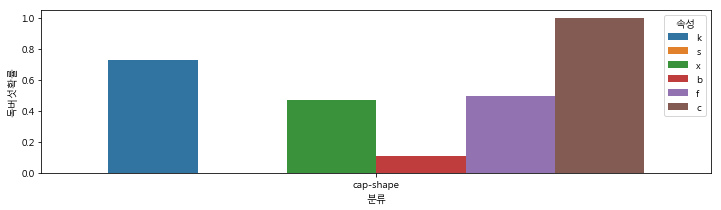

In [105]:
sns.barplot(data = data_cal[data_cal['분류'] == data_cal.columns[0]], x ='분류', y = '독버섯확률', hue = '속성')

In [121]:
data_cal.columns[2]

'독버섯수'

In [138]:
ss = list(set(data_cal['분류']))

In [139]:
type(ss)

list

In [146]:
len(ss)

22

In [140]:
ss[2]

'stalk-color-above-ring'

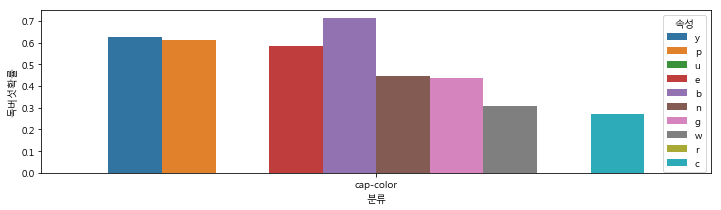

In [141]:
sns.barplot(data = data_cal[data_cal['분류'] == ss[0]], x ='분류', y = '독버섯확률', hue = '속성')

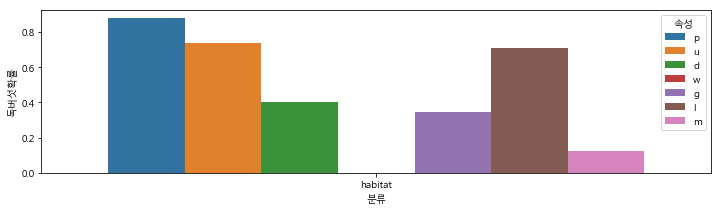

In [142]:
sns.barplot(data = data_cal[data_cal['분류'] == ss[1]], x ='분류', y = '독버섯확률', hue = '속성')

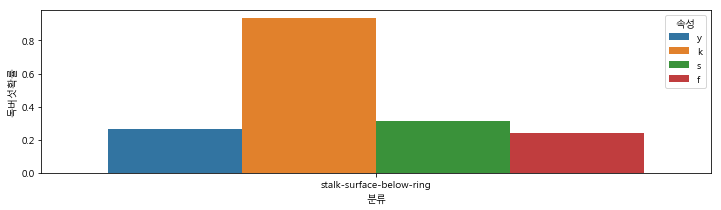

In [150]:
sns.barplot(data = data_cal[data_cal['분류'] == ss[5]], x ='분류', y = '독버섯확률', hue = '속성')

In [155]:
# 독버섯 확률순으로 정렬하기 @리스트
results_sort = sorted(results, key = lambda x:x[4], reverse =True)

In [161]:
results_sort[:20]

[['cap-shape', 'c', 4, 0, 1.0, 0.0],
 ['cap-surface', 'g', 4, 0, 1.0, 0.0],
 ['odor', 'y', 576, 0, 1.0, 0.0],
 ['odor', 's', 576, 0, 1.0, 0.0],
 ['odor', 'p', 256, 0, 1.0, 0.0],
 ['odor', 'm', 36, 0, 1.0, 0.0],
 ['odor', 'f', 2160, 0, 1.0, 0.0],
 ['odor', 'c', 192, 0, 1.0, 0.0],
 ['gill-color', 'b', 1728, 0, 1.0, 0.0],
 ['gill-color', 'r', 24, 0, 1.0, 0.0],
 ['stalk-color-above-ring', 'y', 8, 0, 1.0, 0.0],
 ['stalk-color-above-ring', 'b', 432, 0, 1.0, 0.0],
 ['stalk-color-above-ring', 'c', 36, 0, 1.0, 0.0],
 ['stalk-color-below-ring', 'y', 24, 0, 1.0, 0.0],
 ['stalk-color-below-ring', 'b', 432, 0, 1.0, 0.0],
 ['stalk-color-below-ring', 'c', 36, 0, 1.0, 0.0],
 ['veil-color', 'y', 8, 0, 1.0, 0.0],
 ['ring-number', 'n', 36, 0, 1.0, 0.0],
 ['ring-type', 'n', 36, 0, 1.0, 0.0],
 ['ring-type', 'l', 1296, 0, 1.0, 0.0]]

In [189]:
# 독버섯 확률 순으로 정렬하기 @Pandas
data_cal_sort = data_cal.sort_values(by='독버섯확률', ascending=False)
data_cal_sort.head(20)

,분류,속성,독버섯수,식용버섯수,독버섯확률,식용버섯확률
99,spore-print-color,r,72,0,1.0,0.0
47,gill-color,r,24,0,1.0,0.0
28,odor,c,192,0,1.0,0.0
27,odor,f,2160,0,1.0,0.0
25,odor,m,36,0,1.0,0.0
24,odor,p,256,0,1.0,0.0
23,odor,s,576,0,1.0,0.0
22,odor,y,576,0,1.0,0.0
93,ring-type,l,1296,0,1.0,0.0
92,ring-type,n,36,0,1.0,0.0


# 2. 데이터 나누기(학습/테스트)

In [165]:
data_x = data.iloc[:,1:]
data_y = data.iloc[:,0]

In [166]:
data_x.columns[1]

'cap-surface'

In [84]:
##삭제가능
results=[]
for fe in data_x.columns:
    
    for att in set(data[fe]):
        
        count_p = len(data_x[(data_x[fe] == att) & (data_y == 'p')])
        count_e = len(data_x[(data_x[fe] == att) & (data_y == 'e')])
        result = [fe, att, count_p, count_e, count_p/(count_p+count_e), count_e/(count_p+count_e)]
        results.append(result)

In [85]:
#삭제가능
results

[['cap-shape', 'k', 600, 228, 0.7246376811594203, 0.2753623188405797],
 ['cap-shape', 's', 0, 32, 0.0, 1.0],
 ['cap-shape', 'x', 1708, 1948, 0.4671772428884026, 0.5328227571115973],
 ['cap-shape', 'b', 48, 404, 0.10619469026548672, 0.8938053097345132],
 ['cap-shape', 'f', 1556, 1596, 0.4936548223350254, 0.5063451776649747],
 ['cap-shape', 'c', 4, 0, 1.0, 0.0],
 ['cap-surface', 'y', 1740, 1504, 0.5363748458692972, 0.4636251541307028],
 ['cap-surface', 'g', 4, 0, 1.0, 0.0],
 ['cap-surface', 's', 1412, 1144, 0.5524256651017214, 0.4475743348982786],
 ['cap-surface', 'f', 760, 1560, 0.3275862068965517, 0.6724137931034483],
 ['cap-color', 'y', 672, 400, 0.6268656716417911, 0.373134328358209],
 ['cap-color', 'p', 88, 56, 0.6111111111111112, 0.3888888888888889],
 ['cap-color', 'u', 0, 16, 0.0, 1.0],
 ['cap-color', 'e', 876, 624, 0.584, 0.416],
 ['cap-color', 'b', 120, 48, 0.7142857142857143, 0.2857142857142857],
 ['cap-color', 'n', 1020, 1264, 0.44658493870402804, 0.553415061295972],
 ['cap-co

In [88]:
#삭제가능
data_cal = pd.DataFrame(results, columns = ['분류', '속성', '독버섯수','식용버섯수', '독버섯확률','식용버섯확률'])

In [64]:
#삭제가능
pd.value_counts(data.groupby(data_x.columns[1],'class'))

ValueError: No axis named class for object type <class 'pandas.core.frame.DataFrame'>

# 3. 분류모델 학습하기

### pd.get_dummies: 명목형 변수 정리하기

In [167]:
data_x = pd.get_dummies(data_x, drop_first=True)   # one-hot

In [ ]:
# c.f) 교재내용
# 데이터 내부의 분류 변수 전개하기
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    exdata = []
    for col, v in enumerate(row.iloc[1:]):   # enumerate : 값과 index를 반환할 때 사용
        if row_index == 0:
            attr = {"dic": {}, "cnt":0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        # 버섯의 특징 기호를 배열로 나타내기
        d = [0,0,0,0,0,0,0,0,0,0,0,0]    # 하나의 특징을 총 12개의 요소를 가지는 배열로 one hot encoding 합니다. (22 * 12)
        if v in attr["dic"]:
            idx = attr["dic"][v]
        else:
            idx = attr["cnt"]
            attr["dic"][v] = idx
            attr["cnt"] += 1
        d[idx] = 1
        exdata += d
    data.append(exdata)

In [168]:
# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = train_test_split(data_x, data_y) # train , test 비율을 3:1 비율로 나누어 줍니다.

In [169]:
# 데이터 학습시키기 --- (※4)
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# 4. 분류 결과 확인하기

In [170]:
# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 1.0
리포트 =
              precision    recall  f1-score   support

          e       1.00      1.00      1.00      1041
          p       1.00      1.00      1.00       990

avg / total       1.00      1.00      1.00      2031



# 5. 결과 해석하기

In [180]:
ifs = clf.feature_importances_  # 제일 중요한 factor 

factor_check ={}
for i, score in enumerate(ifs):
#     print('{} : {}'.format(data_x.columns.values[i] , score))
    factor_check[data_x.columns.values[i]]=score
print(factor_check)    

{'spore-print-color_h': 0.055868354265078704, 'cap-color_r': 0.0, 'stalk-root_c': 0.033230598453927715, 'cap-shape_c': 0.0, 'gill-spacing_w': 0.0036187112050132773, 'stalk-color-above-ring_g': 0.0, 'bruises_t': 0.033043506069028485, 'cap-color_y': 0.0096590790137200903, 'stalk-color-below-ring_p': 0.0050885763327096021, 'cap-surface_s': 0.0018791556392950977, 'stalk-color-above-ring_p': 0.00070195478923687266, 'stalk-color-above-ring_n': 0.0, 'habitat_l': 0.0011658544940401487, 'stalk-root_b': 0.014550139428659991, 'odor_y': 0.013310019748273904, 'population_n': 0.006211659859106199, 'ring-type_n': 0.0011941811970812334, 'spore-print-color_o': 0.0, 'stalk-root_r': 0.00131966131359567, 'stalk-color-above-ring_e': 0.0, 'cap-shape_f': 0.00029718537257852852, 'gill-color_y': 0.0, 'habitat_p': 0.0066831968316374323, 'cap-color_w': 0.0020652222016129202, 'stalk-color-above-ring_c': 0.0, 'stalk-color-below-ring_g': 1.1199639670480561e-06, 'gill-color_e': 4.204036092873665e-05, 'spore-print-co

In [179]:
max(factor_check)

'veil-color_y'

In [181]:
sorted_factor = sorted(factor_check.items(), key=lambda x:x[1], reverse=True)

In [187]:
print(sorted_factor[:20])

[('odor_n', 0.31586867072832564), ('gill-size_n', 0.06555199259228052), ('spore-print-color_h', 0.055868354265078704), ('odor_f', 0.049862142527602807), ('stalk-surface-above-ring_k', 0.043954739492002973), ('odor_l', 0.040124493992453943), ('spore-print-color_w', 0.036794097995010211), ('stalk-root_c', 0.033230598453927715), ('bruises_t', 0.033043506069028485), ('stalk-surface-below-ring_k', 0.031286773291704123), ('odor_p', 0.021475346712587599), ('stalk-root_e', 0.020623439205523519), ('ring-number_t', 0.018480436849625435), ('population_v', 0.017423657428517408), ('spore-print-color_n', 0.016956007768684077), ('stalk-surface-below-ring_y', 0.016663879109230166), ('stalk-root_b', 0.014550139428659991), ('ring-type_p', 0.01407689640990006), ('odor_y', 0.013310019748273904), ('odor_s', 0.01240568868614113)]


In [176]:
from pprint import pprint  # 프린트 예쁘게 (줄바꿈 같은거...)

In [188]:
pprint(sorted_factor[:20])

[('odor_n', 0.31586867072832564),
 ('gill-size_n', 0.06555199259228052),
 ('spore-print-color_h', 0.055868354265078704),
 ('odor_f', 0.049862142527602807),
 ('stalk-surface-above-ring_k', 0.043954739492002973),
 ('odor_l', 0.040124493992453943),
 ('spore-print-color_w', 0.036794097995010211),
 ('stalk-root_c', 0.033230598453927715),
 ('bruises_t', 0.033043506069028485),
 ('stalk-surface-below-ring_k', 0.031286773291704123),
 ('odor_p', 0.021475346712587599),
 ('stalk-root_e', 0.020623439205523519),
 ('ring-number_t', 0.018480436849625435),
 ('population_v', 0.017423657428517408),
 ('spore-print-color_n', 0.016956007768684077),
 ('stalk-surface-below-ring_y', 0.016663879109230166),
 ('stalk-root_b', 0.014550139428659991),
 ('ring-type_p', 0.01407689640990006),
 ('odor_y', 0.013310019748273904),
 ('odor_s', 0.01240568868614113)]


In [191]:
data_cal[data_cal['분류']=='odor']

,분류,속성,독버섯수,식용버섯수,독버섯확률,식용버섯확률
22,odor,y,576,0,1.000000,0.000000
23,odor,s,576,0,1.000000,0.000000
24,odor,p,256,0,1.000000,0.000000
25,odor,m,36,0,1.000000,0.000000
26,odor,n,120,3408,0.034014,0.965986
27,odor,f,2160,0,1.000000,0.000000
28,odor,c,192,0,1.000000,0.000000
29,odor,l,0,400,0.000000,1.000000
30,odor,a,0,400,0.000000,1.000000


### 추가) pandas 활용하여 데이터 전환하기(정리)

In [ ]:
# cf) 교재 내용

# 데이터 내부의 기호를 숫자로 변환하기--- (※2)
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    row_data = []
    for v in row.iloc[1:]:
        row_data.append(ord(v))  # 참고 : ord() 는 문자의 아스키 값을 반환하여 줍니다. a ~ z -> 97 ~ 122, ? -> 63
    data.append(row_data)

### pandas 활용해서 데이터 변환하기   pd.applymap / pd.apply

In [ ]:
# pd.applymap(함수)  ==> 원소별 함수 적용

mr_edit2 = pd.DataFrame()
mr_edit2 = mr.applymap(lambda x: ord(x))

In [ ]:
mr_edit2.head()

In [ ]:
# pd.apply(함수) ==>  column 별 함수 적용  /   cf) pd.apply(함수, axis = 1)

mr_edit3 = pd.DataFrame()
for column in mr.columns:
    mr_edit3[column] = mr[column].apply(lambda x: ord(x))

In [ ]:
# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = \
    train_test_split(data, label) # train , test 비율을 3:1 비율로 나누어 줍니다.

In [ ]:
print('data_train의 수 : ', len(data_train))
print('data_test의 수 : ', len(data_test))

In [ ]:
# 데이터 학습시키기 --- (※4)
clf = RandomForestClassifier()
clf.fit(data_train, label_train)